In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#### Define the class robot (For plotting)

In [61]:
class Robot():
    def __init__(self,l1=1., l2=1.):
        self.l1 = l1
        self.l2 = l2
        self.theta1 = 0.
        self.theta2 = 0.
        
    def set_dof(self,theta):
        self.theta1 = theta[0]
        self.theta2 = theta[1]
            
    def plot(self, ax = None):
        x = [0., self.l1*np.cos(self.theta1), self.l1*np.cos(self.theta1) + self.l2*np.cos(self.theta1+ self.theta2)]
        y = [0., self.l1*np.sin(self.theta1), self.l1*np.sin(self.theta1) + self.l2*np.sin(self.theta1+ self.theta2)]
        if ax is None: fig, ax = plt.subplots(nrows = 1, figsize = (6,6))
        plt.plot(x,y,'b',linewidth=5)
        plt.plot(x[:-1],y[:-1],'oy',markersize=3 )

        
        #add base
        rect = patches.Rectangle((-0.15,-0.15),0.3,0.3,linewidth=1,edgecolor='g',facecolor='g')
        ax.add_patch(rect)
        fac = 1.3
        ax.set(xlim=(-fac*self.l1-fac*self.l2,fac*self.l1+fac*self.l2), ylim=( -fac*self.l1-fac*self.l2,fac*self.l1+fac*self.l2))
        return ax

#### Define a robot

In [62]:
l1 = 1.
l2 = 1.
robot = Robot(l1=l1, l2=l2)

#### Set the dof, and plot

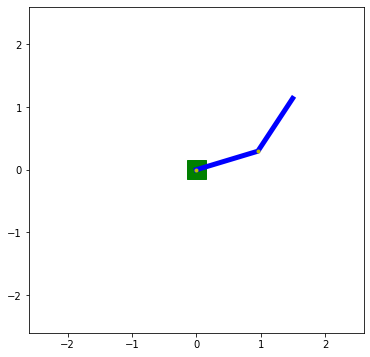

In [63]:
robot.set_dof([0.3,0.7]) #change these values to change the robot position
ax = robot.plot()

#### Inverse kinematics

Given the desired robot tip (end-effector) position, find the corresponding joint angles

In [64]:
def forward_kine(theta1, theta2, l1, l2):
    x = l1*np.cos(theta1) + l2*np.cos(theta1+ theta2)
    y = l1*np.sin(theta1) + l2*np.sin(theta1+ theta2)
    return np.array([x,y])

In [72]:
def inverse_kine(pos, l1, l2):
    #Equations taken from:https://robotacademy.net.au/lesson/inverse-kinematics-for-a-2-joint-robot-arm-using-geometry/
    #But the equations for q1b in the slide seems to be wrong; both terms should be positive
    
    
    x, y = pos[0], pos[1]
    q2a = np.arccos((x**2 + y**2 -l1**2 -l2**2)/(2*l1*l2))
    q1a = np.arctan2(y,x) - np.arctan2((l2*np.sin(q2a)), (l1 + l2*np.cos(q2a)))
    
    q2b = -np.arccos((x**2 + y**2 -l1**2 -l2**2)/(2*l1*l2))
    q1b = np.arctan2(y,x) - np.arctan2((l2*np.sin(q2b)), (l1 + l2*np.cos(q2b)))
    
    return np.array([q1a,q2a]), np.array([q1b,q2b]) #two solutions

#### Set the desired pose

In [75]:
# pos = np.array([1.,1.3])
pos = np.random.rand(2)

#### Find IK and Plot

For 2 links robot, there are (almost) always two IK solutions

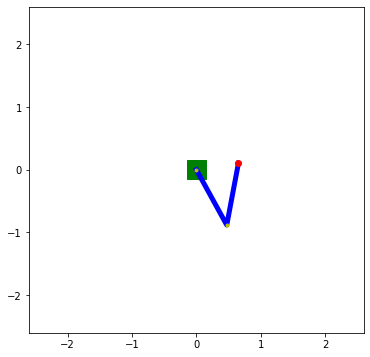

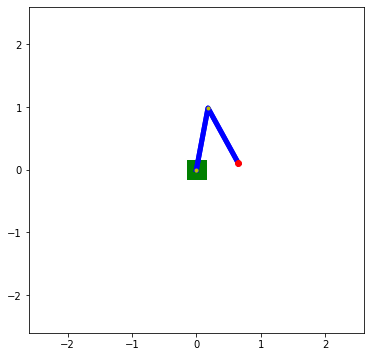

In [76]:
#Given desired pos, find theta
theta_a, theta_b = inverse_kine(pos, l1, l2)

#Plot the robot A
robot.set_dof(theta_a)
ax = robot.plot()

#Plot the desired pos
ax.plot(pos[0], pos[1], 'or')

#Plot the robot B
robot.set_dof(theta_b)
ax = robot.plot()
ax = robot.plot(ax) #to plot at the same plot as A

#Plot the desired pos
ax.plot(pos[0], pos[1], 'or')